## Spotify Top 100 Songs of 2010-2019

https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019

In [231]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [232]:
os.getcwd()

'c:\\FCD\\Projects\\Top_100_Spotify_Songs'

In [233]:
df = pd.read_csv('Spotify 2010 - 2019 Top 100.csv', sep = ',', )

In [234]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [235]:
df.shape

(1003, 17)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


Here we can see that 'year released' and 'top year' are as float64 type. We need to transform to 'object' type

In [237]:
df['year released'] = df['year released'].astype('Int64')
df['top year'] = df['top year'].astype('Int64')
print(df['year released'].dtype)
print(df['top year'].dtype)

Int64
Int64


In [238]:
df.isna().sum()

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64

In [239]:
# The missing data is in the last 3 rows
na_data = df[df.isna().any(axis = 1)]
na_data

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
1000,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1001,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1002,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [240]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019,Solo
1000,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1001,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1002,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [241]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [242]:
df.dropna(axis = 0, inplace = True)

In [243]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019,Solo


In [244]:
# Creating a new column 'year_ranking'
ranking = np.arange(1,101,1)
ranking = np.tile(ranking, reps = 10)
df.insert(0, 'year_ranking', ranking)


In [245]:
df.sample(5)

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
229,30,Good Feeling,Flo Rida,dance pop,2012,2020‑06‑22,128.0,89.0,71.0,-4.0,31.0,68.0,248.0,6.0,7.0,81.0,2012,Solo
151,52,All Of The Lights,Kanye West,chicago rap,2010,2020‑06‑16,142.0,80.0,53.0,-3.0,18.0,22.0,300.0,8.0,7.0,82.0,2011,Solo
153,54,Firework,Katy Perry,dance pop,2010,2020‑06‑16,124.0,83.0,64.0,-5.0,11.0,65.0,228.0,14.0,5.0,72.0,2011,Solo
962,63,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2018,2020‑06‑22,114.0,79.0,60.0,-6.0,39.0,24.0,217.0,1.0,7.0,84.0,2019,Solo
130,31,I'm On One,DJ Khaled,dance pop,2011,2020‑06‑16,149.0,81.0,41.0,-3.0,63.0,44.0,296.0,5.0,32.0,75.0,2011,Solo


In [246]:
df.describe()

,year_ranking,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.500000,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,28.880514,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1.000000,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,25.750000,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,50.500000,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,75.250000,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,100.000000,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


We can see that there're songs that was released after 2019, which is not normal, since this dataset is the top 100 songs between 2010 and 2019.
We also also notice that there is a song that was released in 1975. Let's see it closely to check if it's all right.

In [247]:
# So there's one song in 1975 and 9 songs released after 2019
df['year released'].value_counts().sort_index()

1975      1
2009     24
2010     94
2011     93
2012    109
2013     86
2014    101
2015     99
2016     86
2017     99
2018    112
2019     87
2020      6
2021      3
Name: year released, dtype: Int64

In [248]:
df[(df['year released'] == 1975)]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
982,83,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019,Band/Group


In [249]:
# It's a 2011 remastered song. So we need to change the 'year released' to 2011
df['year released'].iloc[982] = 2011

In [250]:
df['year released'].iloc[982]

2011

In [251]:
# After a quick search, we got the right 'year released' for those songs
# Songs with 'year released' = 2020
df[(df['year released'] == 2020)]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
69,70,Eenie Meenie,Sean Kingston,dance pop,2020,2022‑02‑17,121.0,64.0,73.0,-3.0,10.0,84.0,202.0,3.0,3.0,72.0,2010,Solo
98,99,We No Speak Americano (Edit),Yolanda Be Cool,australian dance,2020,2022‑02‑17,125.0,81.0,90.0,-5.0,9.0,75.0,157.0,7.0,5.0,65.0,2010,Duo
651,52,Gold,Kiiara,alt z,2020,2020‑06‑08,113.0,41.0,60.0,-9.0,13.0,41.0,226.0,62.0,34.0,64.0,2016,Solo
901,2,Easier,5 Seconds of Summer,boy band,2020,2020‑06‑22,176.0,46.0,56.0,-4.0,11.0,62.0,158.0,48.0,26.0,74.0,2019,Band/Group
951,52,i'm so tired...,Lauv,dance pop,2020,2020‑06‑22,102.0,73.0,60.0,-7.0,24.0,53.0,163.0,18.0,20.0,81.0,2019,Solo
972,73,Options,NSG,afro dancehall,2020,2020‑08‑20,102.0,62.0,84.0,-5.0,10.0,76.0,240.0,39.0,9.0,62.0,2019,Band/Group


In [252]:
df['year released'].iloc[69] = 2010
df['year released'].iloc[98] = 2010
df['year released'].iloc[651] = 2016
df['year released'].iloc[901] = 2019
df['year released'].iloc[951] = 2018
df['year released'].iloc[972] = 2019

In [253]:
# Songs with 'year released' = 2021
df[(df['year released'] == 2021)]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
168,69,I Follow Rivers - The Magician Remix,Lykke Li,art pop,2021,2020‑06‑25,122.0,70.0,79.0,-6.0,8.0,30.0,280.0,2.0,4.0,67.0,2011,Solo
182,83,Read All About It,Professor Green,grime,2021,2020‑06‑16,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0,2011,Solo
608,9,Hurts So Good,Astrid S,alt z,2021,2020‑06‑08,120.0,63.0,67.0,-5.0,9.0,42.0,209.0,8.0,5.0,77.0,2016,Solo


In [254]:
df['year released'].iloc[168] = 2010
df['year released'].iloc[182] = 2011
df['year released'].iloc[608] = 2016

In [255]:
df['year released'].value_counts().sort_index()

2009     24
2010     97
2011     95
2012    109
2013     86
2014    101
2015     99
2016     88
2017     99
2018    113
2019     89
Name: year released, dtype: Int64

In [256]:
df.describe()

,year_ranking,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.500000,2014.37200,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,28.880514,2.96216,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1.000000,2009.00000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,25.750000,2012.00000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,50.500000,2014.00000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,75.250000,2017.00000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,100.000000,2019.00000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


Visualizing the numeric variables with an histogram

In [272]:
df['year released'] = df['year released'].astype('int32')
df['top year'] = df['top year'].astype('int32')
print(df['year released'].dtype)
print(df['top year'].dtype)

int32
int32


In [273]:
# Separing the Categorical variables from the Numerics one.
nums = []
for i in df.columns:
    if np.dtype(df[i]) == 'float64':
        nums.append(i)

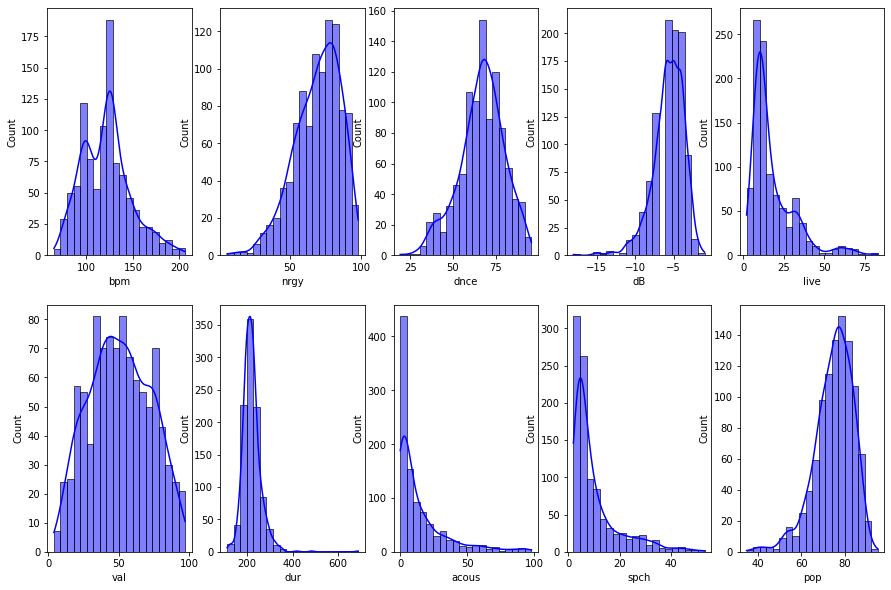

In [274]:
plt.figure(figsize = (15,10))

for i in range(0, len(nums)):
    
    plt.subplot(2, 5, i+1)

    sns.histplot(data = df, x = df[nums[i]] ,color = 'blue', kde= True, bins = 20 )

In [275]:
cat = ['title', 'artist', 'top genre', 'artist type']
df[cat].describe()

,title,artist,top genre,artist type
count,1000,1000,1000,1000
unique,945,444,132,4
top,Paradise,Taylor Swift,dance pop,Solo
freq,3,21,361,748


In [276]:
# Creating a new column 'ranking'
ranking = np.arange(1,101,1)
ranking = np.tile(ranking, reps = 10)
df.insert(0, 'ranking', ranking)


In [277]:
df.sample(5)

,ranking,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,year release
856,57,57,Yes Indeed,Lil Baby,atl hip hop,2018,2020‑06‑22,120.0,35.0,96.0,-9.0,11.0,56.0,142.0,4.0,53.0,84.0,2018,Solo,2018
914,15,15,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115.0,30.0,35.0,-10.0,10.0,12.0,200.0,93.0,3.0,91.0,2019,Solo,2018
97,98,98,No Hands (feat. Roscoe Dash & Wale),Waka Flocka Flame,atl hip hop,2010,2022‑02‑17,131.0,60.0,76.0,-6.0,24.0,36.0,264.0,1.0,4.0,63.0,2010,Solo,2010
83,84,84,All Time Low,The Wanted,boy band,2010,2022‑02‑17,134.0,62.0,69.0,-5.0,8.0,79.0,205.0,35.0,5.0,63.0,2010,Band/Group,2010
692,93,93,Starboy,The Weeknd,canadian contemporary r&b,2016,2020‑06‑08,186.0,59.0,68.0,-7.0,14.0,49.0,230.0,14.0,28.0,88.0,2016,Solo,2016


# Top genres in each year

In [ ]:
# We will only use the top five genre that appers each year, so the pie doesn't get confusing. We will use 'Other' to the rest of the genres

In [278]:
df.columns

Index(['ranking', 'year_ranking', 'title', 'artist', 'top genre',
       'year released', 'added', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val',
       'dur', 'acous', 'spch', 'pop', 'top year', 'artist type',
       'year release'],
      dtype='object')

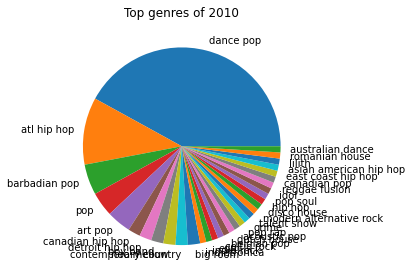

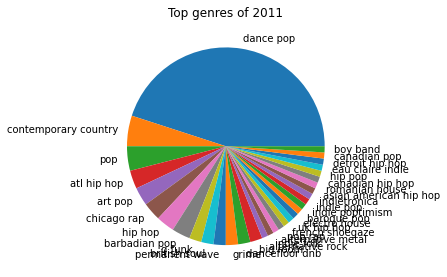

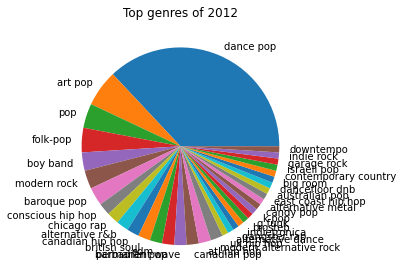

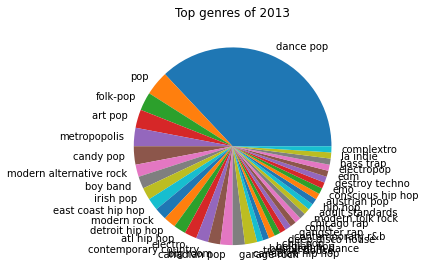

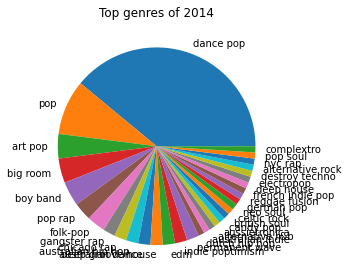

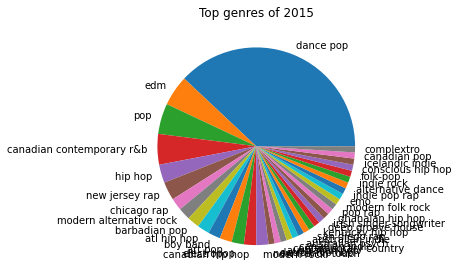

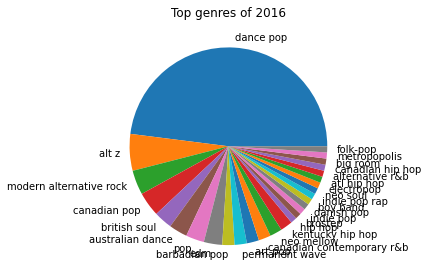

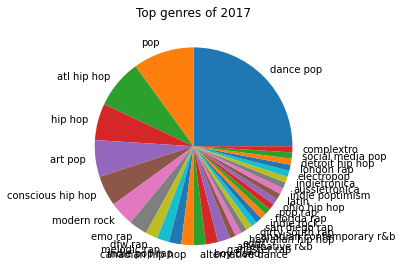

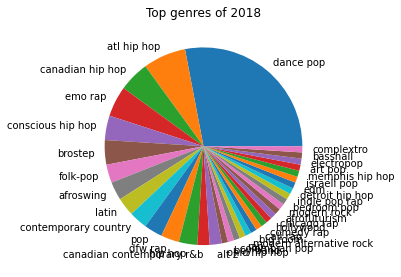

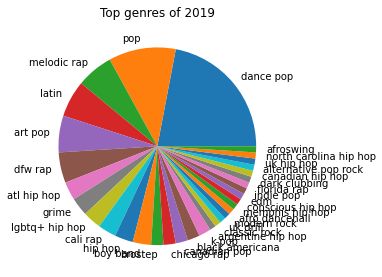

In [296]:
for i in range(2010,2020):
    top_genre = (df[(df['top year'] == i)]['top genre'].value_counts())
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,2)
    plt.pie(top_genre, labels= top_genre.index)
    plt.title(f'Top genres of {i}')
    plt.show()

# Numeric Variables

In [ ]:
# df[nums].describe()

In [ ]:
# plt.figure(figsize = (15,10))

# for i in range(0, len(nums)):
    
#     plt.subplot(2, 5, i+1)

#     sns.histplot(data = df, x = df[nums[i]] ,color = 'blue', kde= True, bins = 20 )

In [ ]:
# df.sample(5)

In [ ]:
# df[(df['top year'] == 2010)]['top genre'].value_counts()

# if df[(df['top year'] == 2010)]['top genre'].value_counts() <= 1:
#     df[(df['top year'] == 2010)]['top genre'] = 'Less than one'


What genre appeared the most in the top 100 songs of each year?

In [ ]:
# for i in range(2010, 2020):
#     x = df[(df['top year'] == i)]['top genre'].value_counts()